In [3]:
from sympy import *
from math import *
import sys


from lib_rungekutta import *

# Phương pháp Runge - Kutta hiện giải bài toán Cauchy cho hệ phương trình vi phân

## 0. Bài toán

Giải hệ phương trình vi phân sau:

$$\begin{cases} \frac{dy_{1}}{dx} = f_{1}(x, y_{1}, y_{2}, ...., y_{r})\\\frac{dy_{2}}{dx} = f_{2}(x, y_{1}, y_{2}, ...., y_{r})\\.... \\\frac{dy_{r}}{dx} = f_{r}(x, y_{1}, y_{2}, ...., y_{r})\end{cases}$$

Ta có thể xây dựng lại như sau:

$$\frac{dY}{dx} = F(x, Y)$$

## 1. Nhập dữ liệu

Nhập hệ phương trình $\frac{dY}{dx} = F(x, Y)$, với $x$ thuộc giá trị thực, $Y$ là vector các nghiệm ${y_{i}}$

In [5]:
def expr(x, y):
#{
    dy = np.zeros((len(y)))

    n = y[0]
    p = y[1]
    K = 100
    r = 0.6
    a = 0.04
    muy = 1.2

    dy[0] = r * n * (1 - n / K) - a * n * p
    dy[1] = -muy * p + a * n * p
    return dy
#}

Nhập giá trị ban đầu $x_{0}$ và $Y(x_{0})$

In [7]:
x_0 = 0
y_0 = [70, 20]

Nhập khoảng cách giữa 2 điểm liên tiếp $h = x_{i} - x_{i-1}$

In [9]:
h = 0.1

Nhập số mốc của lưới điểm $n$ 

In [11]:
n = int(100/0.01)

## 2. Giải PTVP và in ra kết quả
Cấp chính xác:

In [13]:
precision_x   = 3;
precision_y   = 7;
precision_eps = 12;

Giải và in kết quả. Kết quả trả về là dạng `list`, mỗi phần tử có cấu trúc sau:
$$ [x_{i}, Y_{i} = [y_{1}(x_{i}), y_{2}(x_{i}), ..., y_{r}(x_{i})]] $$
với $y_{k}(x_{i})$ là giá trị hàm số $y_{k}$ tại điểm $x_{i}$


In [16]:
uu      = rungekutta_multivariate_oop(expr, x_0, y_0, h, n);
ketqua  = (uu.Solve());

In [18]:
print(f"Phương pháp Runge-Kutta {4} nấc với hoàn tất với lưới điểm sau, sai số toàn cục O(h^{4}) = {round(h**4, precision_eps)}:");
#}
for x in ketqua: print(round(x[0], precision_x), x[1]);


889.0 [30.  10.5]
889.1 [30.  10.5]
889.2 [30.  10.5]
889.3 [30.  10.5]
889.4 [30.  10.5]
889.5 [30.  10.5]
889.6 [30.  10.5]
889.7 [30.  10.5]
889.8 [30.  10.5]
889.9 [30.  10.5]
890.0 [30.  10.5]
890.1 [30.  10.5]
890.2 [30.  10.5]
890.3 [30.  10.5]
890.4 [30.  10.5]
890.5 [30.  10.5]
890.6 [30.  10.5]
890.7 [30.  10.5]
890.8 [30.  10.5]
890.9 [30.  10.5]
891.0 [30.  10.5]
891.1 [30.  10.5]
891.2 [30.  10.5]
891.3 [30.  10.5]
891.4 [30.  10.5]
891.5 [30.  10.5]
891.6 [30.  10.5]
891.7 [30.  10.5]
891.8 [30.  10.5]
891.9 [30.  10.5]
892.0 [30.  10.5]
892.1 [30.  10.5]
892.2 [30.  10.5]
892.3 [30.  10.5]
892.4 [30.  10.5]
892.5 [30.  10.5]
892.6 [30.  10.5]
892.7 [30.  10.5]
892.8 [30.  10.5]
892.9 [30.  10.5]
893.0 [30.  10.5]
893.1 [30.  10.5]
893.2 [30.  10.5]
893.3 [30.  10.5]
893.4 [30.  10.5]
893.5 [30.  10.5]
893.6 [30.  10.5]
893.7 [30.  10.5]
893.8 [30.  10.5]
893.9 [30.  10.5]
894.0 [30.  10.5]
894.1 [30.  10.5]
894.2 [30.  10.5]
894.3 [30.  10.5]
894.4 [30.  10.5]
894.5 [30

Đồ thị:

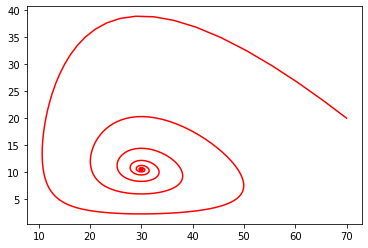

In [19]:
y1  = [];
y2  = [];
y3  = [];
y4  = [];
x   = [];

for xx in ketqua: x.append(xx[0]);
for xx in ketqua: y1.append(xx[1][0]), y2.append(xx[1][1]);

plt.plot(y1, y2, 'r')
plt.show()